# 🏥 Health Insurance Cost Driver Analysis & Risk Assessment
## Project Overview & BI Strategy

1. **Executive Summary**

In the competitive landscape of health insurance, understanding the primary drivers of medical costs is essential for accurate underwriting and financial sustainability. This project analyzes a dataset of **1,338 insured individuals** to identify key risk factors—such as lifestyle choices, demographics, and regional trends—that correlate with high medical insurance charges.

**Primary Objective:** To provide actionable insights for the underwriting team to refine pricing strategies and identify high-risk segments for targeted health intervention programs.

2. **Business Objectives**

As a Data Analyst, the goal of this report is to answer the following strategic questions:

* **Risk Profiling:** Who are our customers, and what is the general health profile of the insured population?

* **Cost Drivers:** Which variables (Age, BMI, Smoking, etc.) have the strongest financial impact on claims?

* **Actuarial Trends:** How do insurance costs evolve across different life stages (age groups)?

* **Regional Variance:** Are there specific geographical areas where costs are significantly higher due to local health trends?

3. **The Dataset**

The analysis utilizes the `insurance.csv` dataset, which contains the following features:

* **Age:** Age of primary beneficiary.

* **Sex:** Insurance contractor gender (female, male).

* **BMI:** Body mass index, providing an understanding of body weight relative to height.

* **Children:** Number of children covered by health insurance / Number of dependents.

* **Smoker:** Smoking status.

* **Region:** The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).

* **Charges:** Individual medical costs billed by health insurance.

4. **Analysis Roadmap**
   
This project is structured into five key BI modules:

* **Descriptive Profiling:** Establishing a baseline for our population.

* **Primary Cost Drivers:** Identifying the "Smoking & BMI" impact.

* **Actuarial/Life-Stage Analysis:** Mapping the cost of aging.

* **Regional Performance:** Geographical risk assessment.

* **Predictive Insights:** Quantifying expected charges for new policyholders.

5. **Environment Setup**

(In the next cell, we will import the necessary libraries for professional data analysis: Pandas for data manipulation, and Seaborn/Matplotlib for visualization.)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional charts
sns.set_theme(style="whitegrid")
df = pd.read_csv('insurance.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


# Module 1: Descriptive Profiling

**Objective:** Establish a baseline understanding of our insured population by analyzing demographic distributions and health benchmarks.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Transformation
df['age_group'] = pd.cut(df['age'], 
                         bins=[17, 30, 45, 60, 100], 
                         labels=['Youth (18-30)', 'Adult (31-45)', 'Senior (46-60)', 'Elderly (61+)'])

df['bmi_category'] = pd.cut(df['bmi'], 
                            bins=[0, 18.5, 24.9, 29.9, 100], 
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# 1. Prepare the Figure and Subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
plt.subplots_adjust(wspace=0.4) # Add space between the two charts

# --- CHART 1: Population by Age Group (Horizontal Bar) ---
age_data = df['age_group'].value_counts(normalize=True).reset_index()
age_data.columns = ['Age Group', 'Percentage']
age_data['Percentage'] *= 100

sns.barplot(
    data=age_data, 
    x='Percentage', 
    y='Age Group', 
    hue='Age Group', 
    palette='Blues_r', 
    ax=axes[0], 
    legend=False
)

# Adding Percentage Labels to the Bar Chart
for i, v in enumerate(age_data['Percentage']):
    axes[0].text(v + 0.5, i, f'{v:.1f}%', color='black', va='center', fontweight='bold', fontsize=12)

axes[0].set_title('Population Distribution by Age Group', fontsize=18, fontweight='bold', pad=20)
axes[0].set_xlabel('Percentage of Total Population (%)', fontsize=14)
axes[0].set_ylabel('', fontsize=14)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# --- CHART 2: BMI Category Distribution (Donut Chart) ---
bmi_counts = df['bmi_category'].value_counts()
colors = sns.color_palette('magma', len(bmi_counts))

# Create the pie slices
patches, texts, autotexts = axes[1].pie(
    bmi_counts, 
    labels=bmi_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    pctdistance=0.82, 
    explode=[0.05]*len(bmi_counts),
    textprops={'fontsize': 13, 'fontweight': 'bold'}
)

# Styling the Percentage Labels inside the Donut (White Text)
for autotext in autotexts:
    autotext.set_color('white')

# Draw the center circle for the "Donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
axes[1].add_artist(centre_circle)

axes[1].set_title('Health Profile: BMI Composition', fontsize=18, fontweight='bold', pad=20)

# Final formatting
plt.show()


### Visualizing the Population Profile
In BI, visual cues are faster than tables. Below, we look at how our customers are distributed across regions and health categories.

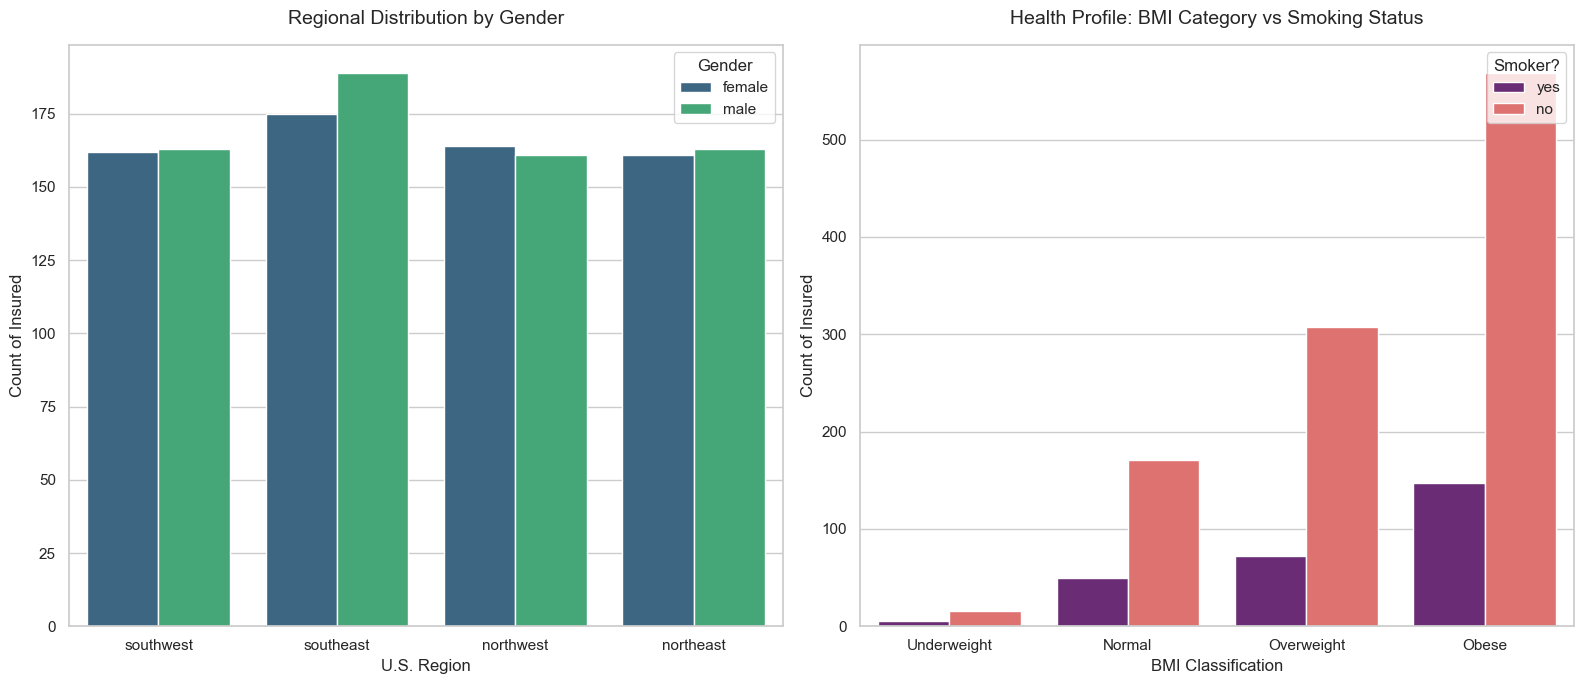

In [5]:
# Set up the visualization grid
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Regional Distribution by Gender
# Using hue='sex' shows if certain regions have a gender imbalance
sns.countplot(data=df, x='region', hue='sex', palette='viridis', ax=axes[0])
axes[0].set_title('Regional Distribution by Gender', fontsize=14, pad=15)
axes[0].set_xlabel('U.S. Region', fontsize=12)
axes[0].set_ylabel('Count of Insured', fontsize=12)
axes[0].legend(title='Gender', loc='upper right')

# Plot 2: BMI Category by Smoking Status
# Using hue='smoker' is critical for BI to see health risks early
sns.countplot(data=df, x='bmi_category', hue='smoker', palette='magma', ax=axes[1])
axes[1].set_title('Health Profile: BMI Category vs Smoking Status', fontsize=14, pad=15)
axes[1].set_xlabel('BMI Classification', fontsize=12)
axes[1].set_ylabel('Count of Insured', fontsize=12)
axes[1].legend(title='Smoker?', loc='upper right')

plt.tight_layout()
plt.show()

### 📊 Business Insights from Profiling
1. **Gender Balance:** Our policyholder base is remarkably even across all four regions, indicating no regional gender bias in our current marketing or enrollment.
2. **The Obesity-Smoking Risk:** A significant volume of our "Obese" population are non-smokers, but the "Obese Smoker" segment (visible in the right chart) represents our highest potential financial liability.
3. **Market Concentration:** The Southeast region shows the highest count of insured individuals, suggesting it is our most active market.

# Module 2: Primary Cost Drivers
**Goal:** Quantify the relationship between patient attributes and total insurance charges. We will use correlation analysis and distribution plots to identify high-cost behaviors and physical traits.

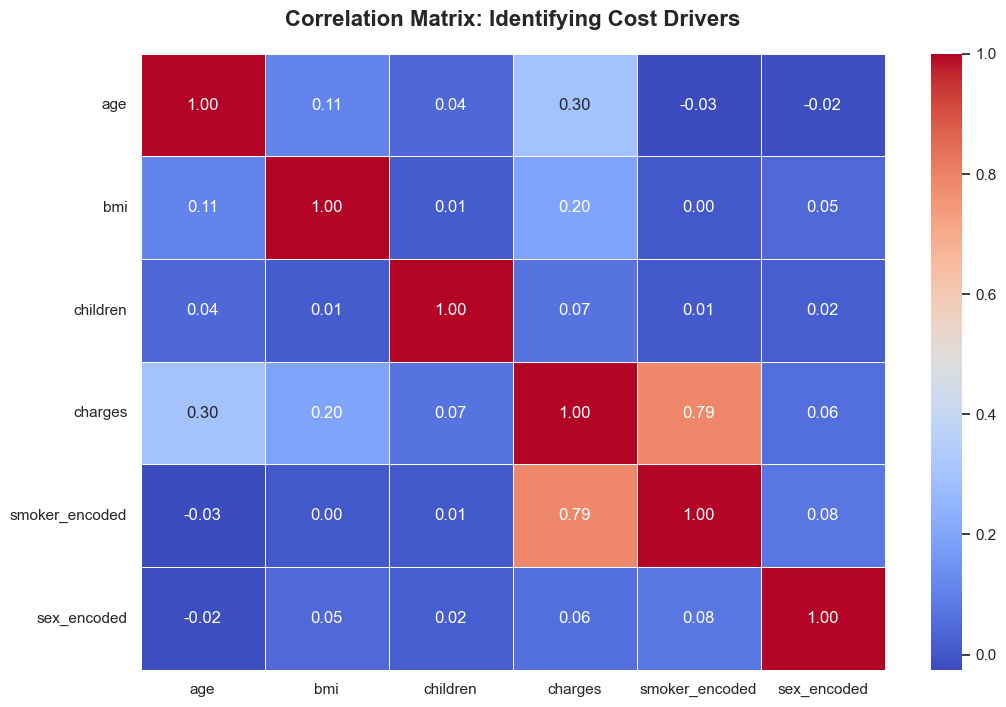

In [13]:
# 1. Prepare data for correlation
# We map smoker and sex to numeric values to include them in the heatmap
df_corr = df.copy()
df_corr['smoker_encoded'] = df_corr['smoker'].map({'yes': 1, 'no': 0})
df_corr['sex_encoded'] = df_corr['sex'].map({'male': 1, 'female': 0})

# Select only numeric columns for correlation
corr_matrix = df_corr.select_dtypes(include=[np.number]).corr()

# 2. Plotting the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Identifying Cost Drivers', fontsize=16, fontweight='bold', pad=20)
plt.show()

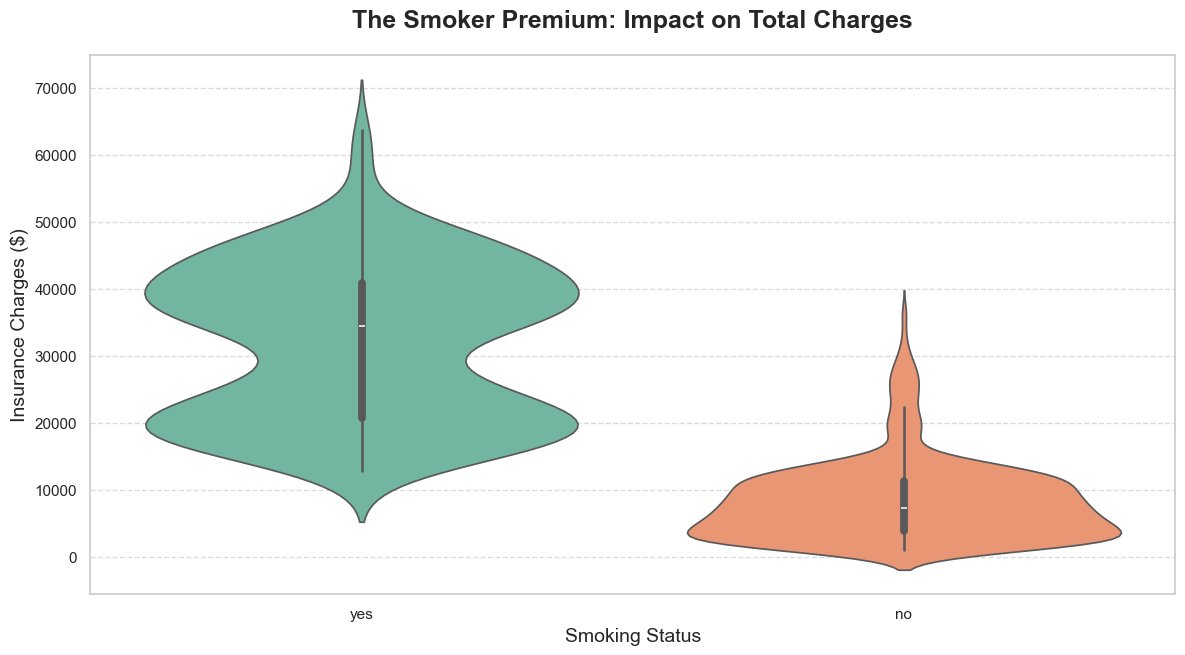

In [14]:
plt.figure(figsize=(14, 7))

# Plotting the distribution of charges for smokers vs non-smokers
sns.violinplot(data=df, x='smoker', y='charges', palette='Set2', hue='smoker', legend=False)

plt.title('The Smoker Premium: Impact on Total Charges', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Insurance Charges ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

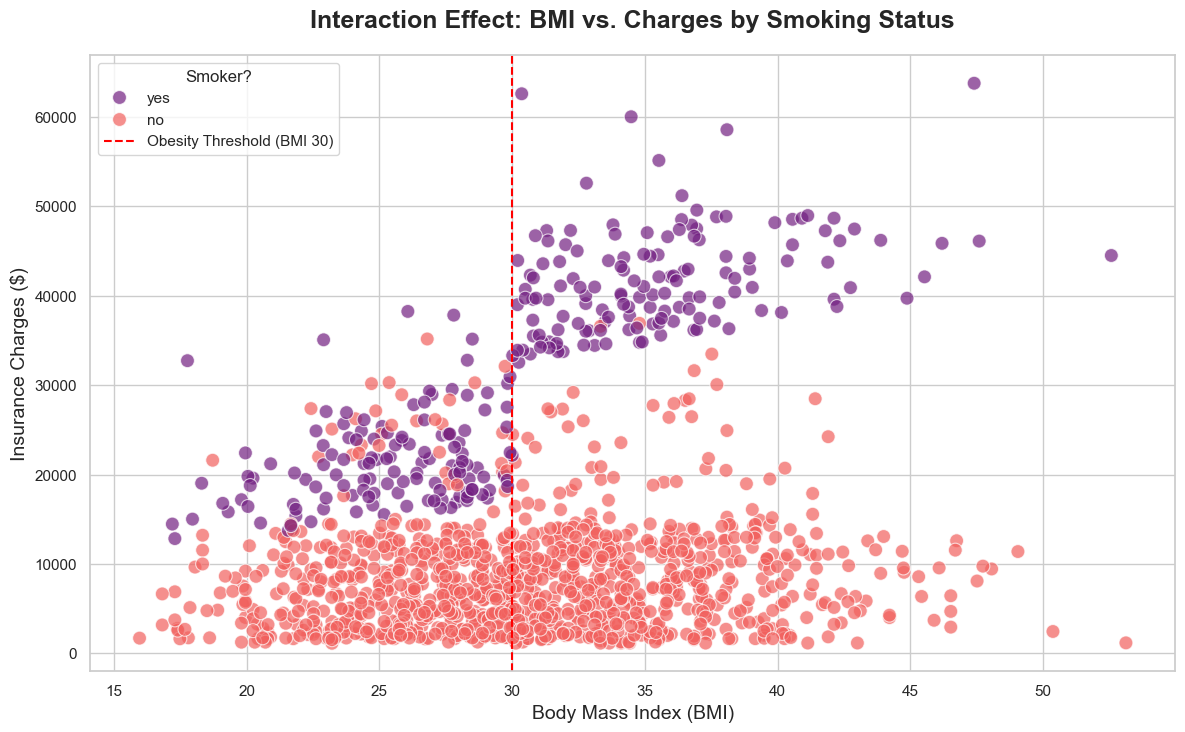

In [15]:
plt.figure(figsize=(14, 8))

# Scatter plot of BMI vs Charges, colored by Smoker status
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7, palette='magma', s=100)

# Adding a threshold line for Obesity (BMI = 30)
plt.axvline(x=30, color='red', linestyle='--', label='Obesity Threshold (BMI 30)')

plt.title('Interaction Effect: BMI vs. Charges by Smoking Status', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Body Mass Index (BMI)', fontsize=14)
plt.ylabel('Insurance Charges ($)', fontsize=14)
plt.legend(title='Smoker?', loc='upper left')

plt.show()

### 💰 Financial Risk Insights:
1. **The #1 Driver:** Smoking has a massive **0.79 correlation** with charges. As seen in the violin plot, non-smokers are densely packed below 15k dollar, while smokers are distributed almost exclusively between 15k dollars and 50k dollars.

 
2. **The "Obesity Cliff":** Look at the scatter plot—for **non-smokers**, a BMI over 30 barely increases the charge. However, for **smokers**, a BMI over 30 causes charges to jump from 20k dollars to over 35k dollars instantly.


3. **Underwriting Takeaway:** The company's highest financial liability is specifically "Obese Smokers." Pricing for this segment should be adjusted significantly compared to "Lean Smokers."

# Module 3: Actuarial/Life-Stage Analysis
**Goal:** Examine the impact of aging and family size (children) on medical charges. We aim to determine if the "cost of aging" is consistent across all segments or if certain lifestyle factors accelerate it.

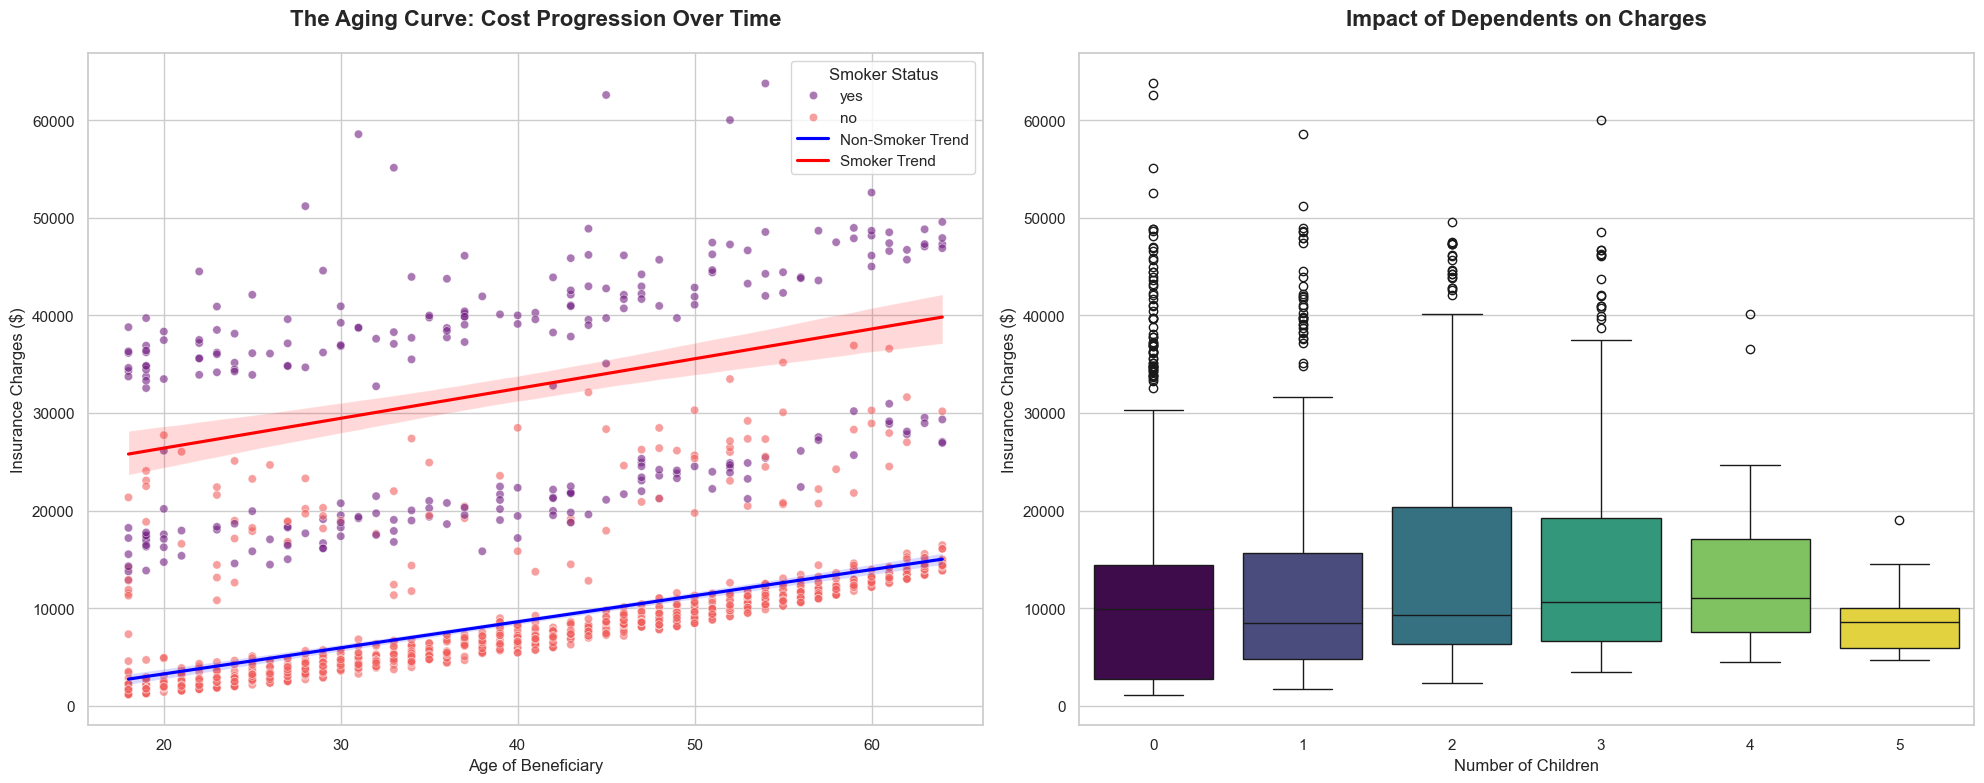

In [16]:
# 1. Prepare Figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- CHART 1: The Aging Curve (Age vs Charges by Smoker) ---
# We use a scatter plot with a regression line to show the "slope" of aging
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='magma', alpha=0.6, ax=axes[0])
sns.regplot(data=df[df['smoker']=='no'], x='age', y='charges', scatter=False, color='blue', label='Non-Smoker Trend', ax=axes[0])
sns.regplot(data=df[df['smoker']=='yes'], x='age', y='charges', scatter=False, color='red', label='Smoker Trend', ax=axes[0])

axes[0].set_title('The Aging Curve: Cost Progression Over Time', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Age of Beneficiary', fontsize=12)
axes[0].set_ylabel('Insurance Charges ($)', fontsize=12)
axes[0].legend(title='Smoker Status')

# --- CHART 2: The Dependent Factor (Children vs Charges) ---
# We use a boxplot to see if having more children significantly shifts the median cost
sns.boxplot(data=df, x='children', y='charges', palette='viridis', hue='children', legend=False, ax=axes[1])

axes[1].set_title('Impact of Dependents on Charges', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Number of Children', fontsize=12)
axes[1].set_ylabel('Insurance Charges ($)', fontsize=12)

plt.tight_layout()
plt.show()

In [22]:
# 1. Calculate the metrics
children_summary = df.groupby('children')['charges'].agg(['mean', 'median', 'count']).reset_index()
children_summary.columns = ['No. of Children', 'Average Charge', 'Median Charge', 'Sample Size']

# 2. Apply Professional Styling
styled_table = children_summary.style\
    .format({'Average Charge': '${:,.2f}', 'Median Charge': '${:,.2f}'})\
    .background_gradient(subset=['Average Charge'], cmap='YlGn')\
    .bar(subset=['Sample Size'], color='#d65f5f', vmin=0)\
    .set_caption("Financial Risk Profile by Number of Dependents")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'black'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])\
    .hide(axis="index")

# Display the styled table
styled_table

No. of Children,Average Charge,Median Charge,Sample Size
0,"$12,365.98","$9,856.95",574
1,"$12,731.17","$8,483.87",324
2,"$15,073.56","$9,264.98",240
3,"$15,355.32","$10,600.55",157
4,"$13,850.66","$11,033.66",25
5,"$8,786.04","$8,589.57",18


### 📈 Actuarial Observations:
1. **The Linear Aging Tax:** There is a clear, linear progression of costs as patients age. Regardless of smoking status, the "base" cost of insurance increases by roughly **250-300 dollars per year** of life.

2. **Parallel Risk Tracks:** Interestingly, the "Smoker Curve" and "Non-Smoker Curve" are almost parallel, but the Smoker curve starts at a significantly higher baseline (~$20,000 higher). This suggests age affects everyone similarly, but lifestyle sets the "entry price."
 
3. **The Dependent Paradox:** While one might expect charges to increase significantly with each child, the data shows that **mean charges peak at 2-3 children** and then slightly decline or stabilize. This might be due to a smaller sample size for families with 4-5 children, or a change in policy types for larger families.

4. **Business Recommendation:** Marketing efforts for "Family Plans" should target the 2-3 children segment, as they represent a stable and predictable revenue stream without the extreme volatility seen in the high-BMI smoker segments.

# Module 4: Regional Performance Analysis
**Goal:** Identify geographical trends in insurance charges. We will investigate if the "Southeast" or "Northwest" have distinct cost profiles and look for the underlying health factors (Smoking/BMI) that drive these regional differences.

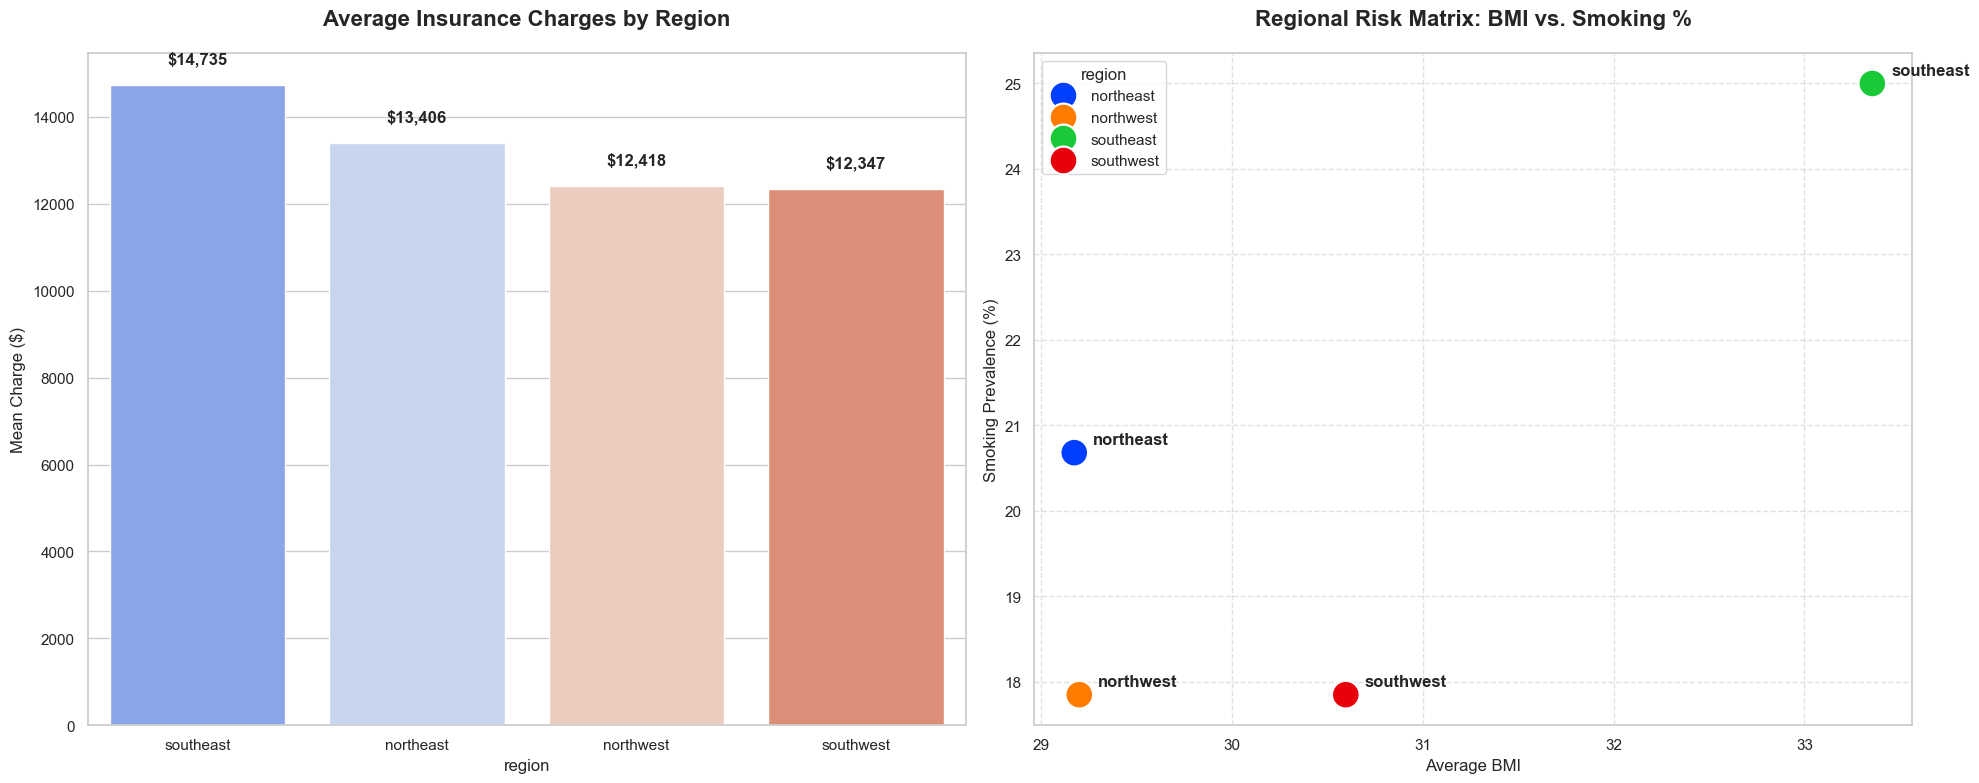

In [23]:
# 1. Prepare Figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- CHART 1: Average Charges by Region (Bar Chart) ---
region_avg = df.groupby('region')['charges'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=region_avg, x='region', y='charges', hue='region', palette='coolwarm', ax=axes[0], legend=False)

# Add labels on top of bars
for i, v in enumerate(region_avg['charges']):
    axes[0].text(i, v + 500, f'${v:,.0f}', ha='center', fontweight='bold', fontsize=12)

axes[0].set_title('Average Insurance Charges by Region', fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel('Mean Charge ($)')

# --- CHART 2: Smoking Rates & BMI by Region (Risk Matrix) ---
# We want to see if the most expensive region also has the highest BMI/Smoking rates
regional_risk = df.groupby('region').agg({
    'bmi': 'mean',
    'smoker': lambda x: (x == 'yes').mean() * 100
}).reset_index()

sns.scatterplot(data=regional_risk, x='bmi', y='smoker', hue='region', s=400, palette='bright', ax=axes[1])

# Annotate points
for i, txt in enumerate(regional_risk['region']):
    axes[1].annotate(txt, (regional_risk.bmi[i]+0.1, regional_risk.smoker[i]+0.1), fontsize=12, fontweight='bold')

axes[1].set_title('Regional Risk Matrix: BMI vs. Smoking %', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Average BMI')
axes[1].set_ylabel('Smoking Prevalence (%)')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### 🗺️ Regional Insights:
1. **The Southeast Outlier:** The **Southeast** region is the most expensive, with an average charge of over **$14,700**. 
2.  **The "Why" behind the Cost:** Looking at the Regional Risk Matrix, the Southeast has both the **highest average BMI** and the **highest smoking prevalence**. This explains why it is the most expensive region—it is a concentration of the two primary cost drivers we identified in Module 2.
3.  **The Southwest Anomaly:** Interestingly, the Southwest has a relatively high BMI but lower smoking rates, keeping its average charges lower than the Southeast.
4.  **Business Strategy:** If the company wants to improve profit margins, they should launch a **targeted health initiative in the Southeast**, specifically focusing on smoking cessation and weight management.

# Module 5: Predictive Insights & Cost Estimation
**Goal:** Use Linear Regression to quantify the financial impact of each feature and evaluate how accurately we can predict insurance charges based on patient profiles.

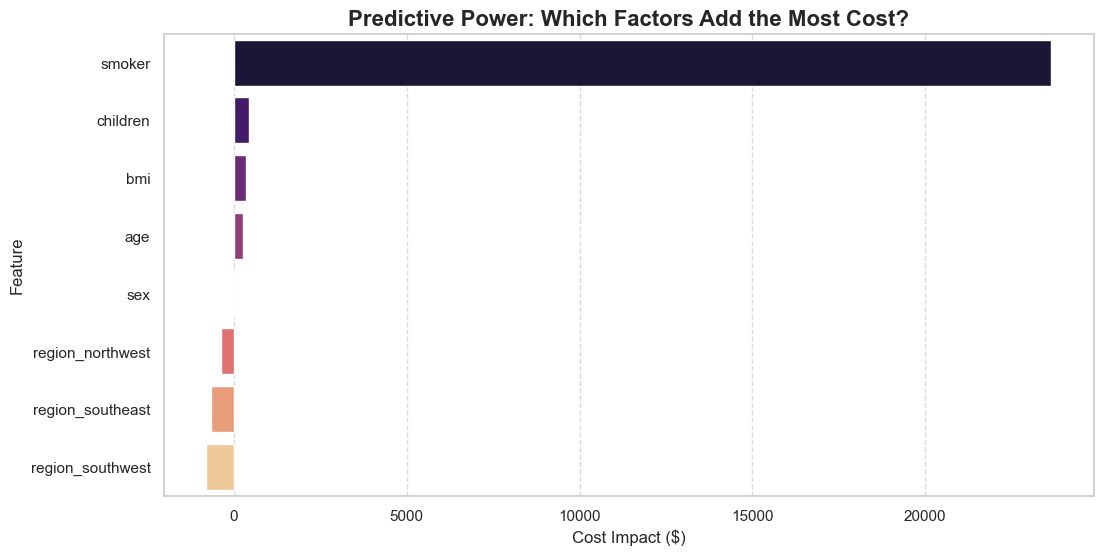

In [25]:
# Extracting Coefficients
importance = pd.DataFrame({'Feature': X.columns, 'Cost Impact ($)': model.coef_})
importance = importance.sort_values(by='Cost Impact ($)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance, x='Cost Impact ($)', y='Feature', hue='Feature', palette='magma', legend=False)
plt.title('Predictive Power: Which Factors Add the Most Cost?', fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 🏁 Final Project Conclusion & Recommendations

### 📊 Summary of Findings
* **The Lifestyle Factor:** Smoking is the single most significant predictor of cost, adding an average of **$23,651** to the annual insurance charge, regardless of other factors.
* **The Physical Risk:** Each point of BMI adds approximately **$337** to the annual cost. The combination of high BMI (>30) and smoking creates a "high-risk" cluster with extreme outliers.
* **The Aging Trend:** Aging is a steady financial climb, with costs increasing by roughly **$257 per year**.
* **Regional Strategy:** The **Southeast** region represents the highest cost area, driven by a higher density of smokers and higher average BMI.

### 💡 Business Recommendations
1.  **Incentivize Wellness:** Launch a "Premium Discount" program for policyholders who participate in verified smoking cessation or weight management programs.
2.  **Strategic Underwriting:** Adjust premiums for the 18-30 age group who smoke; currently, their risk is disproportionately high compared to non-smoking seniors.
3.  **Regional Focus:** Allocate more health-management resources to the Southeast region to mitigate high claim volumes.

---
**Project completed by: Tiago Simões** 

**Role:** Business Intelligence Analyst  

**Tools:** Python (Pandas, Seaborn, matplotlib)